**This Notebook is to Perform Data Cleaning + Model Development + EDA**

# Mount to Google Drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Load Datasets and import libraries

In [ ]:
#library
import pandas as pd
import ipaddress

# Load datasets
ip_mapping_df = pd.read_csv('/content/drive/MyDrive/threat_analysis/ipmapping.csv')
edr_threat_df = pd.read_csv('/content/drive/MyDrive/threat_analysis/edr-threat.csv')

# Data Cleaning

In [ ]:
# Function to find VLAN name based on IP address
def find_vlan_name(ip_address):
    try:
        ip = ipaddress.ip_address(ip_address)  # Convert string IP to an IP object
        for _, row in ip_mapping_df.iterrows():
            if ip in ipaddress.ip_network(row['iprange']):  # Check if IP is in the IP range
                return row['vlanname']  # Return VLAN name
    except ValueError:
        return "Invalid IP"  # Handle invalid IP addresses gracefully
    return "No VLAN found"  # Return this if no VLAN is found

# Test the function with an example IP address
example_ip = '172.22.61.196'
print("Department:", find_vlan_name(example_ip))


Department: WPM & WPS


In [ ]:
# Apply the function to the entire DataFrame to get VLAN names as "Department"
edr_threat_df['Department'] = edr_threat_df['IP Address'].apply(find_vlan_name)

In [ ]:
# Export the updated DataFrame to a new CSV file in Google Drive
edr_threat_df.to_csv('/content/drive/MyDrive/threat_analysis/updated_edr-threat_with_departments.csv', index=False)

# Explore Data Analysis

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

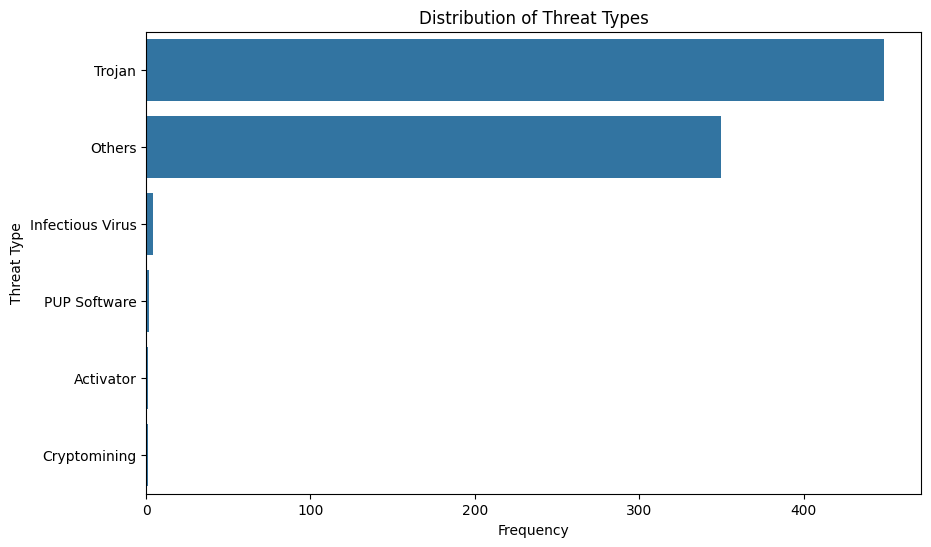

In [ ]:
# Threat type distribution
plt.figure(figsize=(10, 6))
sns.countplot(y='Type', data=edr_threat_df, order=edr_threat_df['Type'].value_counts().index)
plt.title('Distribution of Threat Types')
plt.xlabel('Frequency')
plt.ylabel('Threat Type')
plt.show()
